# Building a regression model

## Install libraries

One of the new libraries we will be using is `statsmodels`, created and given away as open-source software by Skipper Seabold (American U), Josef Perktold (UNC), Chad Fulton (Federal Reserve), Kevin Sheppard (Oxford), and many others.

We will also be using `seaborn` for visualizing graphs, also an open-source project by Martin Waskom (NYU, Flatiron Health)

In [ ]:
!pip install pandas openpyxl statsmodels seaborn

## Import libraries -- a pink box with `FutureWarning` is normal and OK

In [2]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


## Load and explore data

In [3]:
data = pd.read_excel('supermarket_marketing.xlsx')

In [4]:
data.sample(5).T

,317,1236,1405,1637,913
id,6878,1490,8939,2930,10951
phone,4571452287.0,3374101130.0,4522443459.0,4398177415.0,7731418468.0
country,SP,CA,SP,SA,SP
education,High-school,High-school,High-school,Master,High-school
married,Widow,Married,Divorced,Single,Married
income,27421.0,55759.0,61250.0,68092.0,45688.0
birthyear,1954,1962,1959,1978,1968
wine,43,675,382,852,279
fruit,12,0,138,60,0
meat,96,85,65,207,18


## Creating a new variable based on existing variables

In [5]:
data['kids_teens_at_home'] = data['kids_at_home'] + data['teens_at_home']
data['kids_teens_at_home'].value_counts()

1    1103
0     626
2     418
3      52
Name: kids_teens_at_home, dtype: int64

## Drawing a scatterplot showing the relationship between two variables

<AxesSubplot:xlabel='sweets', ylabel='kids_teens_at_home'>

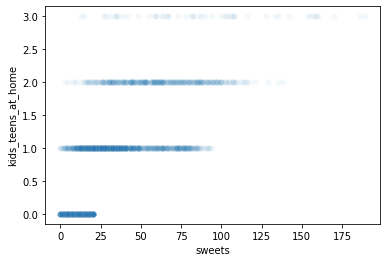

In [6]:
sns.scatterplot(data=data, x='sweets', y='kids_teens_at_home', alpha=.05)

<AxesSubplot:xlabel='birthyear', ylabel='kids_teens_at_home'>

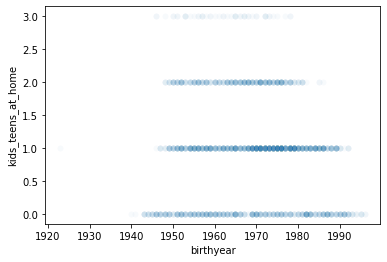

In [7]:
sns.scatterplot(data=data, x='birthyear', y='kids_teens_at_home', alpha=.03)

# Pivot tables

What if we want to get the mean (or average) amount of sweets purchases, broken out by the number of kids and teens at home? We can use `pivot` function:

In [8]:
data.pivot(columns='kids_teens_at_home', values='sweets').mean()

kids_teens_at_home
0    10.674121
1    35.495920
2    60.686603
3    90.019231
dtype: float64

Or the same question, but for wine instead of sweets?

In [9]:
data.pivot(columns='kids_teens_at_home', values='wine').mean()

kids_teens_at_home
0    486.361022
1    268.544878
2    142.062201
3    166.346154
dtype: float64

Instead of finding the mean (or average), we could also add them all up with `.sum()`, which would tell us the total sales by each category. On average, families with more kids and teens at home spend more on sweets, but there are apparently far fewer of them, because total sales to 3 kid+teen households are very low:

In [10]:
data.pivot(columns='kids_teens_at_home', values='sweets').sum()

kids_teens_at_home
0     6682.0
1    39152.0
2    25367.0
3     4681.0
dtype: float64

In [11]:
data.pivot(columns='kids_teens_at_home', values='birthyear').mean()

kids_teens_at_home
0    1968.520767
1    1970.417044
2    1965.698565
3    1962.461538
dtype: float64

What if we flip the columns and values? This gives us the mean number of kids and teens at home for each birthyear:

In [12]:
data.pivot(columns='birthyear', values='kids_teens_at_home').mean()

birthyear
1923    1.000000
1940    0.000000
1941    0.000000
1943    0.000000
1944    0.000000
1945    0.000000
1946    0.437500
1947    0.312500
1948    0.681818
1949    0.833333
1950    1.344828
1951    1.000000
1952    1.000000
1953    1.114286
1954    0.938776
1955    1.020408
1956    1.109091
1957    1.023256
1958    0.981132
1959    0.862745
1960    0.957447
1961    0.972222
1962    0.976744
1963    1.090909
1964    1.142857
1965    1.040541
1966    1.148936
1967    1.363636
1968    1.428571
1969    0.971014
1970    0.973684
1971    1.137931
1972    1.142857
1973    1.188406
1974    1.031250
1975    1.084337
1976    1.081395
1977    1.040000
1978    1.054054
1979    1.000000
1980    0.894737
1981    0.923077
1982    0.488889
1983    0.585366
1984    0.763158
1985    0.774194
1986    0.690476
1987    0.333333
1988    0.571429
1989    0.655172
1990    0.294118
1991    0.066667
1992    0.307692
1993    0.000000
1994    0.000000
1995    0.000000
1996    0.000000
dtype: float64

<AxesSubplot:xlabel='birthyear'>

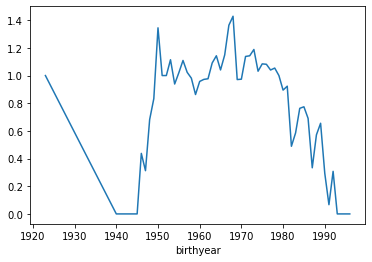

In [13]:
data.pivot(columns='birthyear', values='kids_teens_at_home').mean().plot(kind='line')

## Regressions
For regressions, we need one input column and at least one input column. You cannot include the output column in the list of input columns

In [14]:
output_column = 'kids_teens_at_home'

In [15]:
input_columns = ['birthyear','wine','fruit','sweets','num_web_orders']

In [16]:
if output_column in input_columns:
    print("ERROR! You cannot include the output column in the input column")
else:
    print("OK")

OK


In [17]:
data[input_columns]

,birthyear,wine,fruit,sweets,num_web_orders
0,1943,532,126,18,5
1,1951,48,5,13,2
2,1954,161,0,48,4
3,1955,264,0,17,6
4,1957,230,42,67,7
...,...,...,...,...,...
2194,1949,2,1,16,0
2195,1977,1,0,17,0
2196,1971,39,1,36,1
2197,1982,55,16,16,0


In [18]:
all_relevant_columns = input_columns.copy()
all_relevant_columns.append(output_column)
all_relevant_columns

['birthyear',
 'wine',
 'fruit',
 'sweets',
 'num_web_orders',
 'kids_teens_at_home']

In [19]:
data_cleaned = data[all_relevant_columns].dropna()

output = data_cleaned[output_column]
inputs = data_cleaned[input_columns]

## Training the model

In [20]:
model = sm.OLS(output, inputs).fit()

### The model summary gives us a lot of information -- too much! We want to focus on two aspects: 
- R-squared, which is 0.816, which says that our model got within 81.6% of the correct values for `kids_teens_at_home`
- The second table with all of our columns
  - Focus on the `coef` column: the coefficient or weight of that variable in the formula, but normalized to the z-score.
  - Focus on the `P>|t|` column: the probability (between 0 and 1) that this column is actually unrelated to the output column
      - The closer to 0, the more this column should be in your final formula
      - People disagree over how large is too large: some remove everything over 0.01, 0.05, or 0.1
      - We will use 0.1, so remove columns from the list of inputs if they are __over__ 0.1
- Note that `e` means "10 to the power of", or the number of spaces to move the decimal point forward or backward. So 2.23e-07 is 0.000000223. If the number after `e` is negative, add 1 minus that number of zeros before it. 2.23e+07 would be 22300000.

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     kids_teens_at_home   R-squared (uncentered):                   0.816
Model:                            OLS   Adj. R-squared (uncentered):              0.815
Method:                 Least Squares   F-statistic:                              1943.
Date:                Thu, 10 Nov 2022   Prob (F-statistic):                        0.00
Time:                        21:56:46   Log-Likelihood:                         -1687.4
No. Observations:                2199   AIC:                                      3385.
Df Residuals:                    2194   BIC:                                      3413.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
birthyear          0.0002   1.44e-05     14.930      0.000       0.000       0.000
wine              -0.0003    4.2e-05     -6.674      0.000      -0.000      -0.000
fruit             -0.0035      0.000    -11.381      0.000      -0.004      -0.003
sweets             0.0166      0.000     37.819      0.000       0.016       0.017
num_web_orders     0.0329      0.005      6.856      0.000       0.023       0.042
==============================================================================
Omnibus:                      151.993   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.228
Skew:                           0.640   Prob(JB):                     4.93e-42
Kurtosis:                       3.661   Cond. No.                         859.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Weights for all columns with p-values under 0.1:

In [22]:
model.params[model.pvalues < 0.1]

birthyear         0.000215
wine             -0.000280
fruit            -0.003542
sweets            0.016604
num_web_orders    0.032860
dtype: float64

## Make predictions using this formula on our same dataset

In [23]:
output_predicted_name = output_column + "_predicted"

In [24]:
data_cleaned[output_predicted_name] = model.predict(inputs)

In [25]:
data_cleaned.sample(5).T

,1383,1338,1914,753,848
birthyear,1971.000000,1969.000000,1979.000000,1970.000000,1972.000000
wine,637.000000,151.000000,425.000000,110.000000,10.000000
fruit,47.000000,7.000000,115.000000,0.000000,1.000000
sweets,35.000000,39.000000,23.000000,29.000000,66.000000
num_web_orders,6.000000,4.000000,6.000000,2.000000,1.000000
kids_teens_at_home,1.000000,3.000000,1.000000,1.000000,1.000000
kids_teens_at_home_predicted,0.857628,1.135699,0.478637,0.940432,1.546819


## Visualize the actual and predicted columns in a scatterplot:

<AxesSubplot:xlabel='kids_teens_at_home', ylabel='kids_teens_at_home_predicted'>

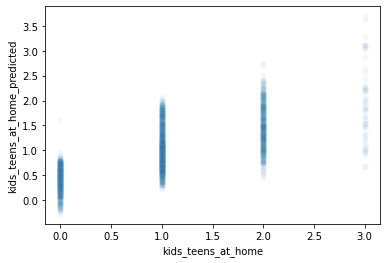

In [30]:
sns.scatterplot(data=data_cleaned, x=output_column, y=output_predicted_name, alpha=0.05)

## Save to excel file

In [ ]:
data_cleaned.to_excel("supermarket_predictions.xlsx")